# Getting started with Julia with examples
This notebook is intended to highlight some of the syntax of Julia through examples. It is not intended to be an exhaustive description. There are lots of good documentation on Julia online. For a more complete outline of the language refer to the [Julia Manual](https://docs.julialang.org/en/v1/manual/getting-started/). There is also a great [YouTube introduction tutorial on Julia](https://www.youtube.com/watch?v=8h8rQyEpiZA&t).

In this example I assume that you are already familiar with general progamming in R or Python.

Many of the examples in this guide are taken from the [Julia By Example](https://juliabyexample.helpmanual.io/) guide.

## Julia performance - slow to start, fast to run.
Julia is a modern language built for high performance scientific programming. It has syntax simplicity similar to Python, but is much faster (10 - 100x). It gets this speed by compiling the script to native code rather than interpretting each line. This compilation is performed Just In Time (JIT) which means that before a block of code is run it is compiled. As a result the first time something is run it will be slow, because the compilation is being performed. Subsequent runs of the code will however be really fast. Nearly as fast as C code.
Python and R on the other hand are interpretted languages making them slow as each line of code needs to be repeatily be analysed to workout the machine instructions needed to match the code being run. Python and R compensate for this inherent slowness by relying on binding to C/C++ libraries to perform any computationally expensive tasks. This means that if your algorithm fits the mold of those available in these libraries you can get good performance in R or Python. But if you are doing something a little different then your code will be slow. Admittedly Python includes a number of techniques and libraries, such as [Numba](https://numba.pydata.org/) to improve its performance. Numba performs JIT compilation on sections of Python to speed them up. Unfortunately it only works on a subset of Python as Python was never designed for performance and so there is no guarantee that it will be able to be used for your custom code.

## Variables
Variables in Julia operate in a manner similar to R and Python. Julia also supports Unicode characters in the variables names. This allows variable names to better express mathematical functions.

In [1]:
x = 1 + 2

3

In [1]:
δ = 0.00001

1.0e-5

Stylistic conventions in variables:
* Variables are in lower case
* Multiple words in variables are joined together, with '_' being used to separate them if they are hard to read.
* Names of Types and Modules use CamelCase.
* Functions and macros use lower case without underscore.
* Functions that modify their arguments (write back to variables that are passed by reference) end in !.

## Totally random but cool demo of mandelbrot set

In [2]:
# Taken from: https://rosettacode.org/wiki/Mandelbrot_set#Julia
function mandelbrot(a)
    z = 0
    for i=1:50
        z = z^2 + a
    end
    return z
end

for y=1.0:-0.05:-1.0
    for x=-2.0:0.0315:0.5
        abs(mandelbrot(complex(x, y))) < 2 ? print("*") : print(" ")
    end
    println()
end

                                                                                
                                                                                
                                                                                
                                                           **                   
                                                         ******                 
                                                       ********                 
                                                         ******                 
                                                      ******** **   *           
                                              ***   *****************           
                                              ************************  ***     
                                              ****************************      
                                           ******************************       
                            

Here is a bunch of examples mostly derived from https://juliabyexample.helpmanual.io/
## Simple functions

In [1]:
#= 
Function to calculate the volume of a sphere. 
Note: this is an example of a multiline comment.
=#
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

vol = sphere_vol(3)
# @printf allows number formatting but does not automatically append the \n to statements, see below
using Printf
@printf "volume = %0.3f\n" vol 
#> volume = 113.097

quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)
#> result 1: 3.0
println("result 2: ", quad2)
#> result 2: -2.0

volume = 113.097
result 1: 3.0
result 2: -2.0


# String Basics

Strings are defined with double quotes like variables. Strings can contain any unicode character

In [4]:
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)

The quick brown fox jumps over the lazy dog α,β,γ


Println adds a new line to the end of output. Print can be used if you dont want that:

In [5]:
print("This")
print(" and")
print(" that.\n")
println("This is a second line.")

This and that.
This is a second line.


Chars are defined with single quotes. The ascii value of a char can be found with Int():

In [6]:
c1 = 'a'
println(c1, " ascii value = ", Int(c1))

# Characters and strings are Unicode
println("Int('α') == ", Int('α'))

a ascii value = 97
Int('α') == 945


Julia allows string Interpolation and these can include statements.

In [9]:
a = "welcome"
b = "julia"
println("$a to $b.")
println("1 + 2 = $(1 + 2)")

welcome to julia.
1 + 2 = 3


Strings can also be concatenated using the * operator. Using * instead of + isn't intuitive when you start with Julia, however [some people think it makes sense](https://groups.google.com/g/julia-users/c/nQg_d_n0t1Q/m/9PSt5aya5TsJ?pli=1). You can also use the string function.

In [10]:
s2 = "this" * " and" * " that"
println(s2)
s3 = string("this", " and", " that")
println(s3)

this and that
this and that


Strings can be parsed to a particular type

In [11]:
e_str1 = "2.718"
println(parse(Float64, e_str1) * 2)
num_15 = parse(Int, "15")

# Note the 3num_15 is equivalent to 3 * num_15
println(3num_15)

5.436
45


Formatting of numbers can be produced using the [printf macro](https://docs.julialang.org/en/v1/stdlib/Printf/#Printf.@printf). In julia printf is implemented as a macro so that the format string can be processed at compile time. This allows it to produce custom code depending on the format string making it much faster. More detail on this can be found in [In Julia, why is @printf a macro instead of a function?](https://stackoverflow.com/questions/19783030/in-julia-why-is-printf-a-macro-instead-of-a-function#:~:text=%40printf%20is%20a%20macro%20so,for%20that%20specific%20format%20string.&text=Julia%20uses%20a%20different%20approach,specific%20to%20that%20format%20specification.). Macro functions are called with the @ symbol.

In [12]:
x = 23.4876
@printf("With two digits: %.2f, with leading spaces %8.2f\n", x, x)

# use sprintf to get the result as a string
s4 = @sprintf("pi is %.4f", pi)
println(s4)

With two digits: 23.49, with leading spaces    23.49
pi is 3.1416


## Arrays
Arrays in Julia have an index starting at 1, similar to Matlab. The arrays can be thought of as a vertical list of numbers.

In [13]:
a1 = [10,20,30]

3-element Array{Int64,1}:
 10
 20
 30

In [14]:
a1[1]

10

Arrays can be verically concatenated with a semicolon (;) and horizontally concatenated using spaces.

In [15]:
a2 = [[10, 20, 30]; [40, 50, 60]]

6-element Array{Int64,1}:
 10
 20
 30
 40
 50
 60

In [16]:
a3 = [10 20 30; 40 50 60]

2×3 Array{Int64,2}:
 10  20  30
 40  50  60

Array values can be accessed by [] and index values or ranges (2:3)

In [17]:
a3[1,2:3]

2-element Array{Int64,1}:
 20
 30

Similar to R you can access all rows and columns with the colon symbol (:).

In [18]:
a3[1,:]

3-element Array{Int64,1}:
 10
 20
 30

Apply the > 20 operation over all elements of the array and use these as indicies into the array. Here we are using the >(20) so that this is a function call to the greater than function. This can also be done using the findall(>(20, a3).

In [19]:
a3[map(>(20), a3)]

4-element Array{Int64,1}:
 40
 50
 30
 60

## Loops and Map and control flow
Unlike R and Python looping code is typically as fast as vectorised code.

In [20]:
for i in 1:5
    print(i, ", ")
end
println()

# In loop definitions "in" is equivilent to "=" 
# (AFAIK, the two are interchangable in this context)
for i = 1:5
    print(i, ", ")
end
println() #> 1, 2, 3, 4, 5,

1, 2, 3, 4, 5, 
1, 2, 3, 4, 5, 


In [21]:
d1 = Dict(1=>"one", 2=>"two", 3=>"three")
# dicts may be looped through using the keys function:
for k in sort(collect(keys(d1)))
    print(k, ": ", d1[k], ", ")
end
println()

1: one, 2: two, 3: three, 


Map applies a function to each of the elements in an array. In the example below the function is defined using an anonymous function that maps x to x^2. 

In [22]:
a4 = map((x) -> x^2, [1, 2, 3, 7])
print(a4) 
println()

[1, 4, 9, 49]


Julias control flow is pretty much the same as most other languages.

In [23]:
function checktype(x)
   if x isa Int
      println("Look! An Int!")
   elseif x isa AbstractFloat
      println("Look! A Float!")
   elseif x isa Complex
      println("Whoa, that's complex!")
   else
      println("I have no idea what that is")
   end
end

checktype(2)
checktype(2.0)
checktype(2.0+3.0im)

1 > 2 ? println("Something weird, 1 is bigger than 2") : println("All is normal")

Look! An Int!
Look! A Float!
Whoa, that's complex!
All is normal


## Types
Types are the key way of structuring data within Julia. Type definitions are similar to typedefs in C. They represent a collection of variables of a specific data type. 

In [24]:
mutable struct Person
    name::AbstractString
    male::Bool
    age::Float64
    children::Int
end

p = Person("Julia", false, 4, 0)
p.name

"Julia"

In [25]:
people = Person[]
push!(people, Person("Steve", true, 42, 2))
push!(people, Person("Jade", false, 17, 3))

2-element Array{Person,1}:
 Person("Steve", true, 42.0, 2)
 Person("Jade", false, 17.0, 3)

In [26]:
people[1].children = 5
people

2-element Array{Person,1}:
 Person("Steve", true, 42.0, 5)
 Person("Jade", false, 17.0, 3)

Here we introduce parametric composite types. In this case the type of the point is specified by the parameter T. This allows the Point to represent a Point of type Int or Float64. This makes this code more reuseable when you start creating functions that handle these parameters.

In [27]:
struct Point{T}
    x::T
    y::T
end

p1 = Point{Float64}(2.0,3.0)
p2 = Point{Int8}(2,3)
p3 = Point{AbstractString}("A","B")

Point{AbstractString}("A", "B")

## Multiple dispatch
In this case the function norm accepts any point where the Point type is of a sub type of Real. In this case it will work for the Float64 and the Int8 but not the AbstractString type. Here we are creating a second function that deals with the string variety. This is obviously a nonsense result, but it does demonstrate the multiple dispatch approach used in Julia, in which the function that is used depends on the types of the arguments.

In [28]:
function norm(p::Point{<:Real})
    sqrt(p.x^2 + p.y^2)
end

function norm(p::Point{AbstractString})
    "norm:  $(p.x), $(p.y) "
end

println(norm(p1))
println(norm(p2))
println(norm(p3))

3.605551275463989
3.605551275463989
norm:  A, B 


## Plotting
Plotting in Julia is only possible with additional packages. 
[Plots.jp package page](http://docs.juliaplots.org/latest/)
If they are not installed already packages are installed using the Pkg.add() command. In this Docker container the Plots package was already installed and precompiled to speed up using this package. Even still the first time you run the plot command it will take about 20 sec.

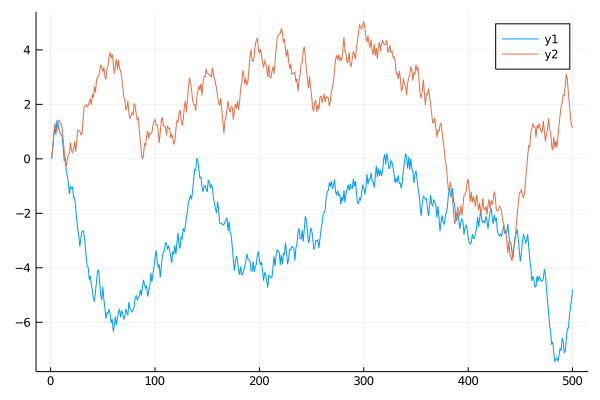

In [29]:
using Plots

# plot some data
plot([cumsum(rand(500) .- 0.5), cumsum(rand(500) .- 0.5)])

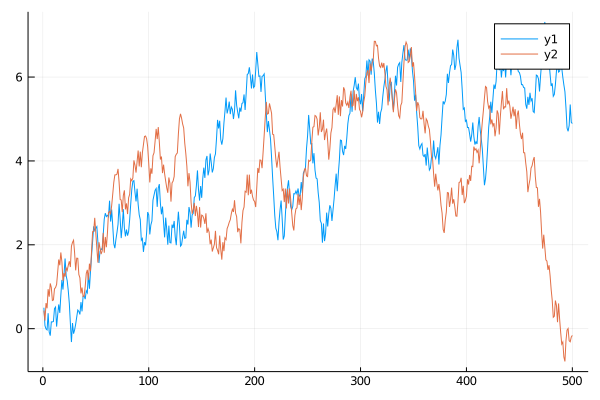

In [30]:
# Lets try plotting again to see that it is faster this time.
plot([cumsum(rand(500) .- 0.5), cumsum(rand(500) .- 0.5)])